In [13]:
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
df = pd.read_csv('data/DERIBIT_ETHPERP.csv')
# df.index = pd.to_datetime(df.index)

Text(0.5, 1.0, 'ETHPERP')

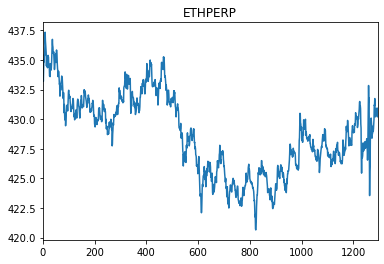

In [18]:
df['close'].plot()
plt.title('ETHPERP')



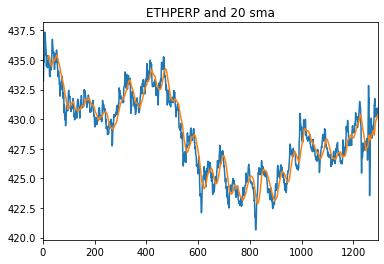

In [23]:
#sma 
def sma(close,period):
    return close.rolling(period).mean()

df['close'].plot()
plt.title('ETHPERP and 20 sma')
sma(df['close'],20).plot()

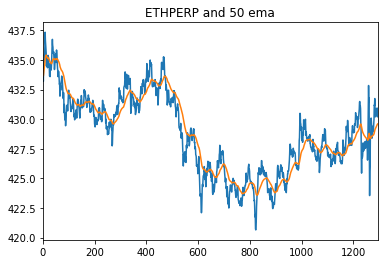

In [54]:
# ema
# def ema(close,period):
#     ema = np.zeros(len(close))
#     k = 2.0/(period + 1)
#     for i in range(1,len(ema)):
#         ema[i] = close[i]*k + close[i-1]*(1 - k)
#     return pd.DataFrame({'ema':ema})

plt.figure()
# period = 50
plt.title(f'ETHPERP and {period} ema')
# ema(df['close'],period).plot()
df['close'].plot()
df['close'].ewm(span = 50).mean().plot()




In [ ]:
# Bollinger Bands

Text(0.5, 1.0, 'ETHPERP and 400 BB 1 std')

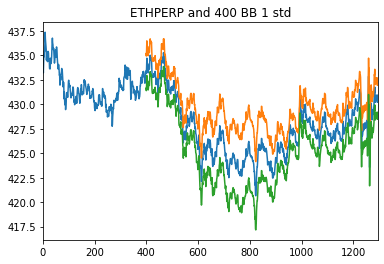

In [63]:
period = 400
df['close'].plot()
(df['close'] + df['close'].rolling(period).std()).plot()
(df['close'] - df['close'].rolling(period).std()).plot()

plt.title(f'ETHPERP and {period} BB 1 std')


Text(0.5, 1.0, 'macd')

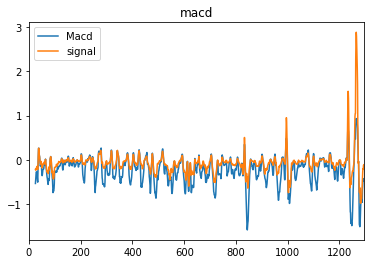

In [70]:
# MACD

fast = 12
slow = 26
# df['close'].plot()

macd =  df['close'].rolling(fast).std() -  df['close'].rolling(slow).std()
macd.plot(label= 'Macd')

signalPeriod = 10
signal = df['close'].rolling(signalPeriod).std()*macd
signal.plot(label= 'signal')

plt.legend()

plt.title(f'macd')

In [76]:
# RSI (there is a bug somewhere)
# close = df['close'].values

# U = np.zeros_like(close)
# D = np.zeros_like(close)

# for i in range(1,len(close)):
#     if close[i] > close[i - 1]:
#         U[i] = close[i - 1] - close[i]
#         D[i] = 0
#     else:
#         D[i] = close[i - 1] - close[i]
#         U[i] = 0
        
# MAU = np.zeros_like(close)
# MAD = np.zeros_like(close)

# period = 14

# for i in range(1,len(close)):
#     MAU[i] = U[i] + MAU[i-1] * (period - 1)/period
#     MAD[i] = D[i] + MAD[i-1] * (period - 1)/period  
    
# RSI = 100 - 100*(1/(1 + (MAU/MAD)))
# # plt.plot(RSI)